In [73]:
# Exercise 4.3a
# Calculating the derivative
def derivative(x, delta):
    f = x * (x - 1)
    fd = (x + delta) * ((x + delta) - 1)
    derivative = (fd - f) / delta
    return derivative
d = derivative(1, 10**-2)
print('Using the computer, the derivative is', d)
print('Analytically, the derivative is 1')
# The reason why these two don't agree perfectly is because the delta that python is using is fairly large,
# analytically we can essentially put that delta down as close to zero as possible

Using the computer, the derivative is 1.010000000000001
Analytically, the derivative is 1


In [76]:
# Exercise 4.3b
# Calculating the derivatives for different deltas
print('For delta 10^-4 the derivative is:', derivative(1, 10**-4)) 
print('For delta 10^-6 the derivative is:', derivative(1, 10**-6)) 
print('For delta 10^-8 the derivative is:', derivative(1, 10**-8)) 
print('For delta 10^-10 the derivative is:', derivative(1, 10**-10)) 
print('For delta 10^-12 the derivative is:', derivative(1, 10**-12)) 
print('For delta 10^-14 the derivative is:', derivative(1, 10**-14)) 
# The approximation gets worse after a certain point because f(x+delta) 
# and f(x) are becoming almost the same, and that effect starts to be 
# seen as the value of the derivative slowly drifts to zero.

For delta 10^-4 the derivative is: 1.0000999999998899
For delta 10^-6 the derivative is: 1.0000009999177333
For delta 10^-8 the derivative is: 1.0000000039225287
For delta 10^-10 the derivative is: 1.000000082840371
For delta 10^-12 the derivative is: 1.0000889005833413
For delta 10^-14 the derivative is: 0.9992007221626509


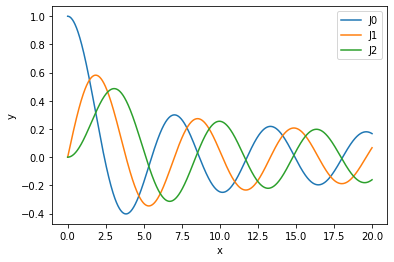

In [89]:
# Exercise 5.4a
import math
from pylab import plot,show,legend
def f(theta, x, m):
    return math.cos((m*theta) - (x*math.sin(theta)))
# Calculating the different Vessel functions
N = 1000
a = 0.0
b = math.pi
h = (b-a)/N
Y0 = []
X0 = []
for i in range(0,1001):
    x = i/50
    m = 0
    s = 0.5*f(a, x, m) + 0.5*f(b, x, m)
    for k in range(1,N):
        s += f(a+k*h, x, m)
    y = h*s*(1/math.pi)
    Y0.append(y)
    X0.append(x)
Y1 = []
X1 = []
for i in range(0,1001):
    x = i/50
    m = 1
    s = 0.5*f(a, x, m) + 0.5*f(b, x, m)
    for k in range(1,N):
        s += f(a+k*h, x, m)
    y = h*s*(1/math.pi)
    Y1.append(y)
    X1.append(x)
Y2 = []
X2 = []
for i in range(0,1001):
    x = i/50
    m = 2
    s = 0.5*f(a, x, m) + 0.5*f(b, x, m)
    for k in range(1,N):
        s += f(a+k*h, x, m)
    y = h*s*(1/math.pi)
    Y2.append(y)
    X2.append(x)
plot(X0, Y0)
plot(X1, Y1)
plot(X2, Y2)
legend(('J0','J1','J2'),loc=0)
xlabel('x')
ylabel('y')
show()


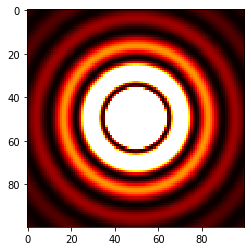

In [87]:
# Exercise 5.4b
import numpy as np
from pylab import imshow,show,hot,xlim,ylim,xlabel,ylabel
def f(theta, x, m):
    return np.cos((m*theta) - (x*np.sin(theta)))
# Calculating the intensity as a function of the radius
N = 1000
k = 1.256 * 10**7
a = 0.0
b = np.pi
h = (b-a)/N 
x = np.linspace(-1.0e-6,1.0e-6,100); 
y = np.linspace(-1.0e-6,1.0e-6,100);
X, Y = np.meshgrid(x, y)
r = np.sqrt( X**2 + Y**2)
def J(m, x):
    s = 0.5*f(a, x, m) + 0.5*f(b, x, m)
    for j in range(1,N,4):
        s += f(a+j*h, x, m)
    for j in range(2,N,2):
        s += f(a+j*h, x, m)
    y = h*s*(1/math.pi)
    return y
I = (J(1, k*r)/(k*r))**2
hot()
imshow(I,vmax=0.001)
show()

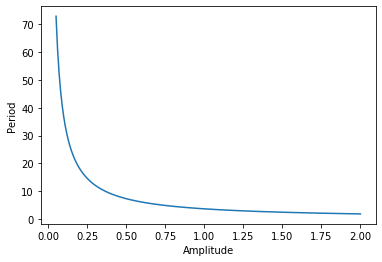

In [88]:
# Exercise 5.10a
# Starting with the equation for the total energy in the system,
# we isolate the derivative of x with respect to t. 
# Then, we bring dx over to the other side of the equation. This gives us:
# dt = (m/sqrt(2))*(dx/sqrt(E-V(x)))
# We then integrate the right side from 0 to 1/4 T and the left side from 0 to x. 
# Simplifying this equation, we can bring a 4 over to the left side of the equation 
# as well as replacing the x in the integral in the left side of the equation with a (x=a),
# This also turns E into V(a), therefore giving us the correct equation for the Period.
# Exercise 5.10b
from numpy import ones,copy,cos,tan,pi,linspace
import numpy as np
# Gaussian function
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w
# Calculating the integral using Gaussian Quadriture
def f(a, x):
    return np.sqrt(8*1)*(1/ np.sqrt(a**4 - x**4))

N = 20
lowerb = 0.0
Y1 = []
X1 = []
for amp in np.linspace(0.05, 2, 200):
    x, w = gaussxw(N)
    xp = 0.5*(amp-lowerb)*x + 0.5*(amp+lowerb)
    wp = 0.5*(amp-lowerb)*w
    s = 0.0
    for k in range(N):
        s += wp[k]*f(amp, xp[k])
    Y1.append(s)
    X1.append(amp)
plot(X1,Y1)
xlabel('Amplitude')
ylabel('Period')
show()
# Exercise 5.10c
# The amplitude increases because the velocity of the ball increases rapidly as you expand the amplitude,
# since the function of x is represented by x^4. This is a very steep function. As the amplitude approaches zero, 
# the function flattens out rapidly, as x values under 1 approaches 0 extremely rapidly (using the same logic as before,
# by looking at the position function x^4)

In [101]:
# Exercise 5.10a
# We replace hbar * omega / k * T with x. From this equation for x, 
# we can take the derivative with respect to omega as well as respect 
# to x on each sides of the equation, thus making d omega = k*T*dx/hbar.
# Substituting these two equations into the equation for Planck's theory of radiation I(omega)d(omega) 
# and simplifying, 
# you can then pull the constants out of the indefinite integral (k^4, T^4, hbar^-4)
# After doing these steps, you are then left with the equation
# for total rate at which energy by a black body per unit area over all frequencies
# Exercise 5.12b
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
def f(z):
    ls = 1/((1-z)**2)
    rs = ((z/(1-z))**3)/(np.exp(z/(1-z))-1)
    return ls*rs
N = 50
a = 0.0
b = 1
x,w = gaussxwab(N,a,b)
s = 0.0
for k in range(N):
    s += w[k]*f(x[k])
sigma = s * ((1.38064852 * 10**-23)**4/(4*(np.pi**2)*(9*10**16)*((1.054*10**-34)**3)))
rsigma = sigma*(10**8)
print('The value of the integral is', '%.2f' % s)
print('The value of the integral multiplied to the constants is', '%.2f' % rsigma + 'e-8')

The value of the integral is 6.49
The value of the integral multiplied to the constants is 5.67e-8
